# Clasificación - SVM - Ejemplo cáncer de mama

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
# Cojunto X
X = cancer["data"]

# Cojunto Y
Y = cancer["target"]

In [16]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
np.unique(Y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [14]:
cancer["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [4]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [17]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### EDA

In [18]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
print("*CANTIDAD de datos nulos por columna en el dataframe")
print(df.isnull().sum())
print("----------------------------------")
print("*PORCENTAJE de datos nulos por columna en el dataframe")
print(df.isnull().sum()/len(df)*100)

*CANTIDAD de datos nulos por columna en el dataframe
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64
----------------------------------
*PORCENTAJE de datos nulos po

In [20]:
np.unique(cancer['target'], return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

Añadimos la target al dataset

In [21]:
df['Cancer'] = pd.DataFrame(cancer['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


[]

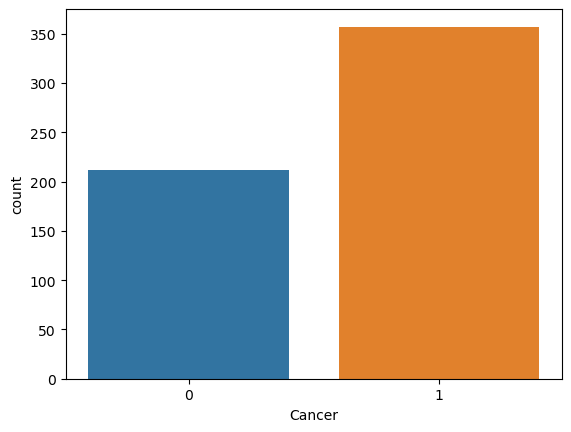

In [23]:
sns.countplot(x='Cancer',data=df)
plt.plot()

C:\Users\jmmor\AppData\Local\Temp\ipykernel_21212\3187368904.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


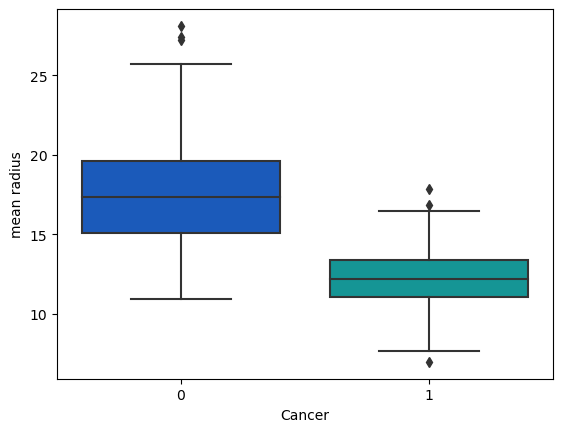

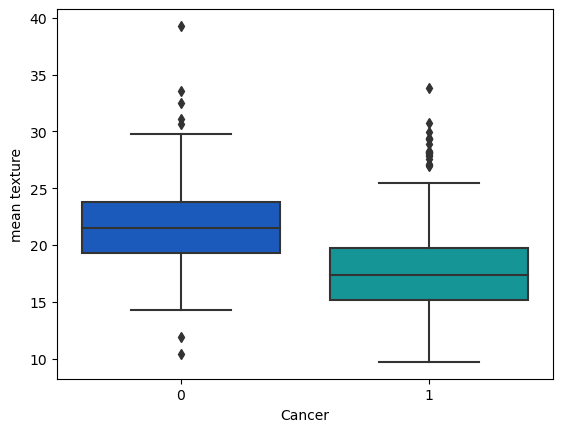

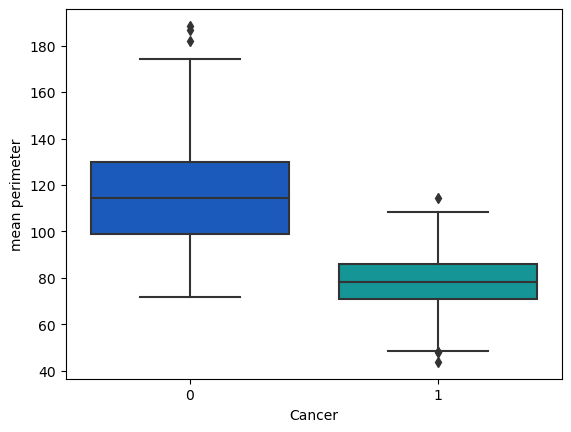

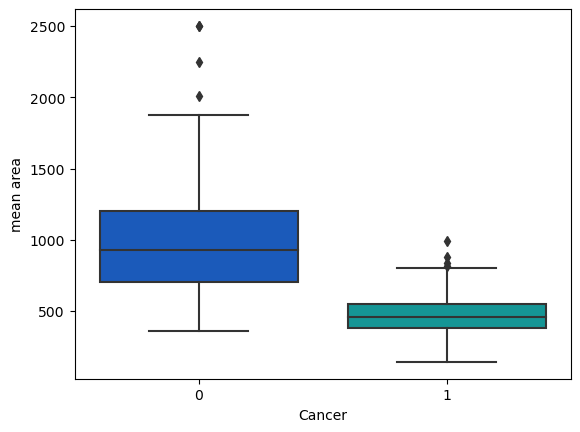

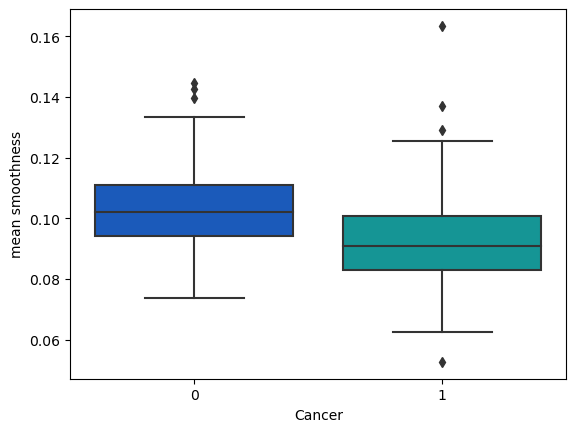

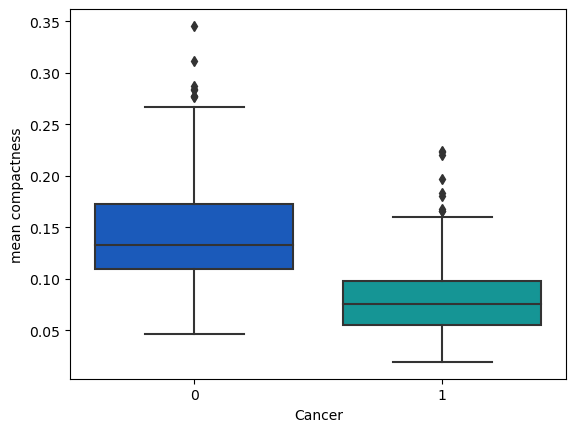

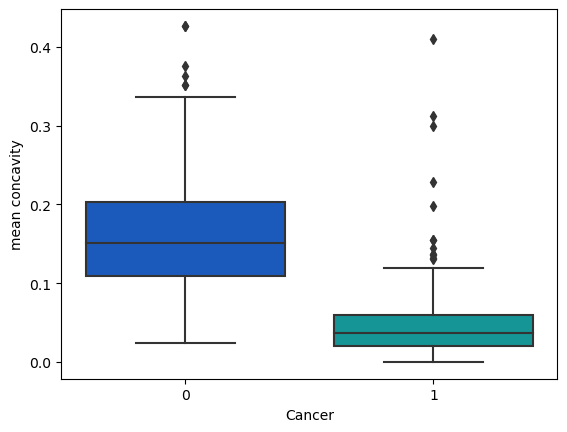

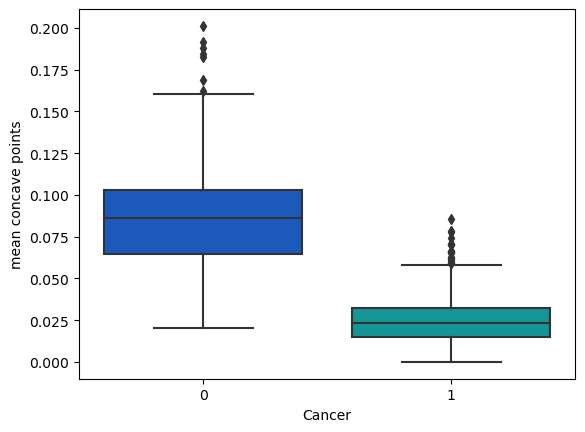

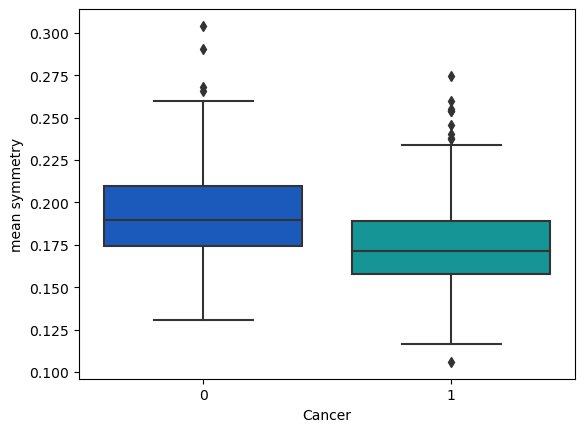

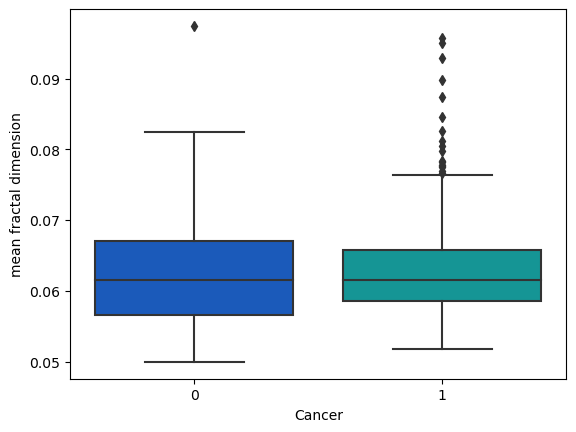

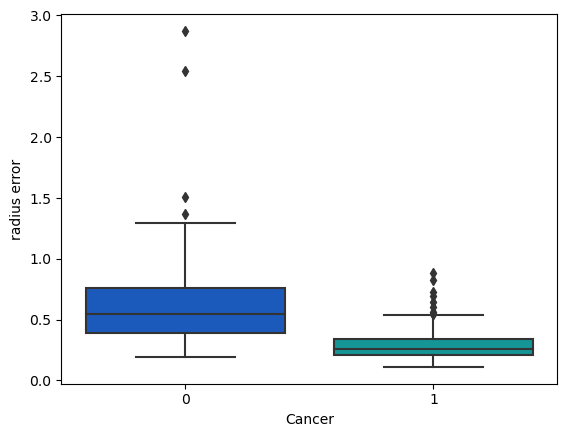

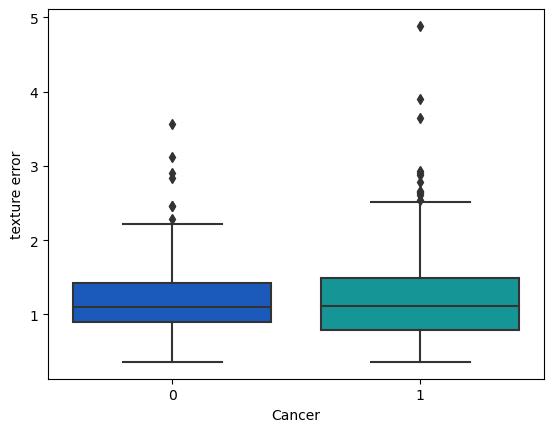

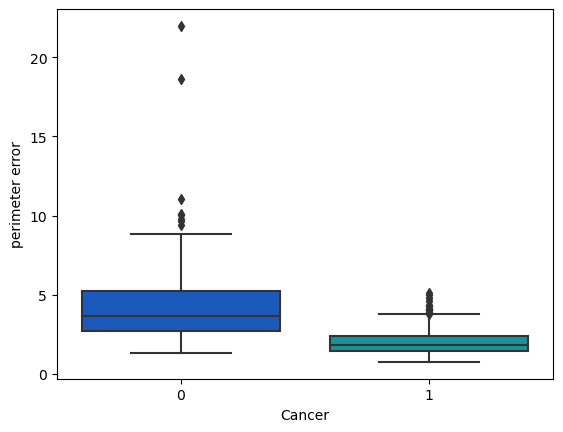

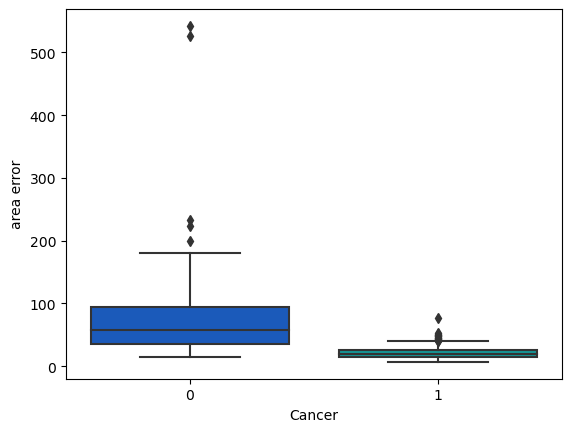

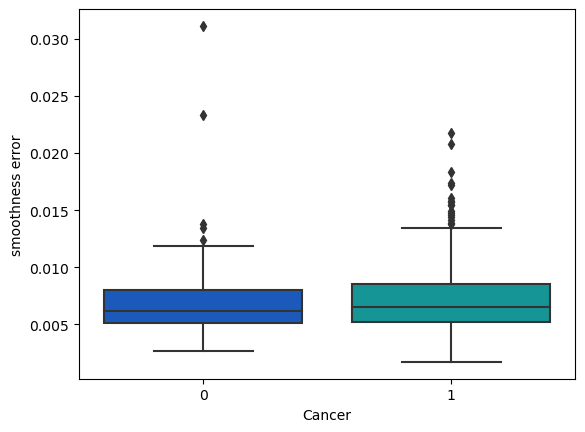

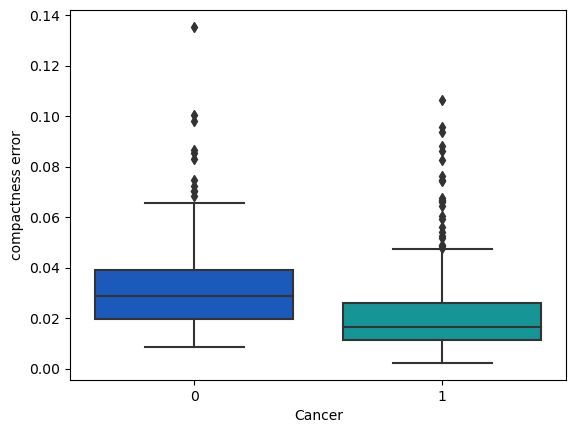

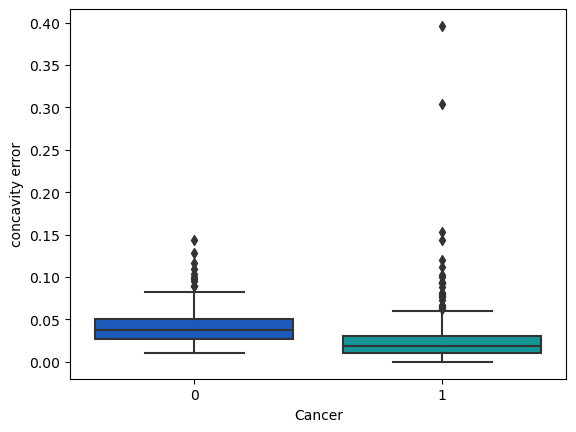

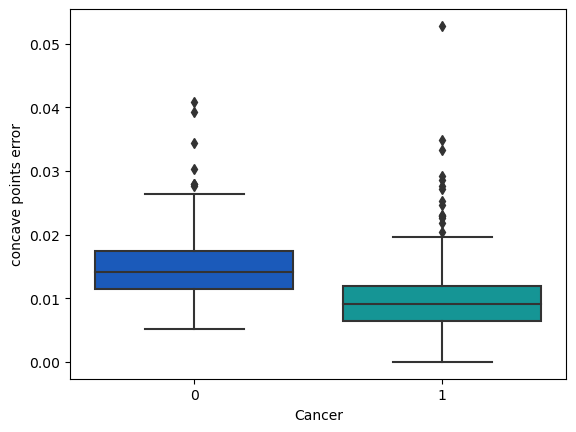

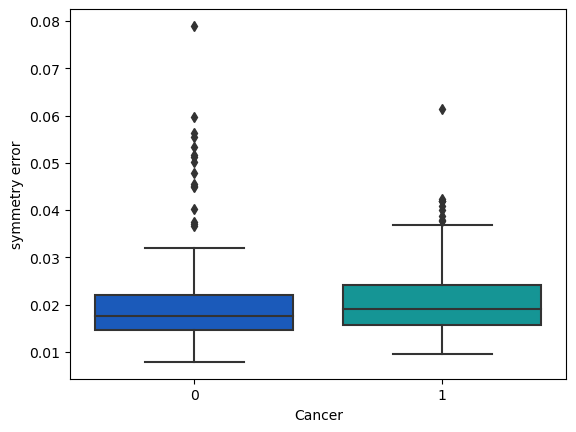

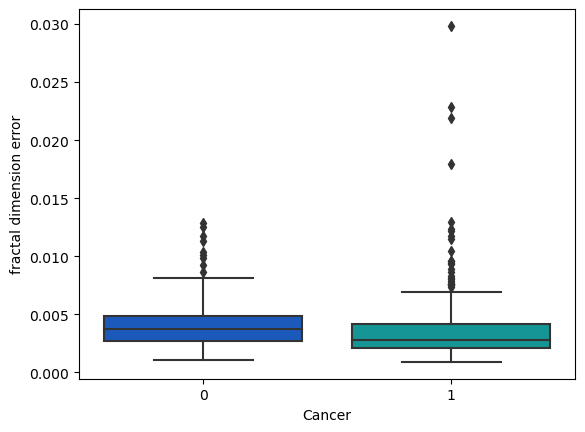

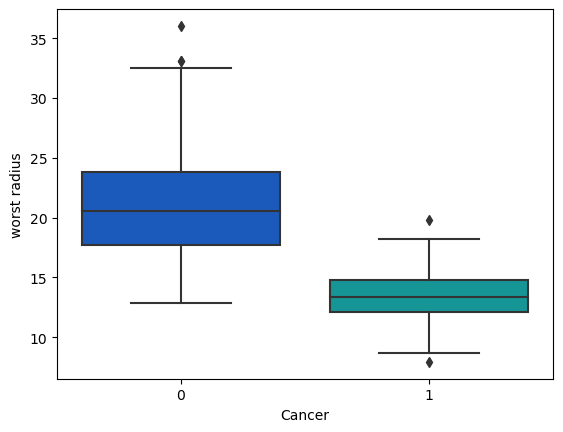

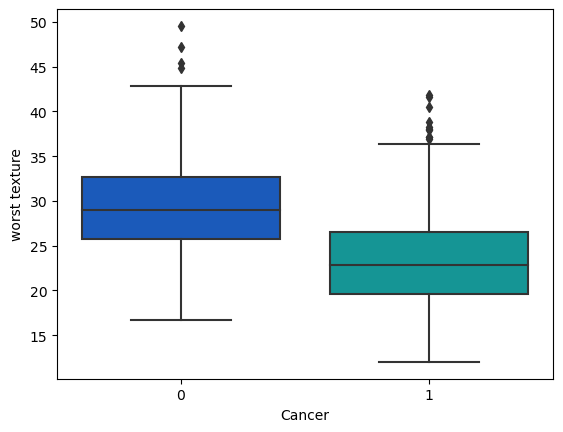

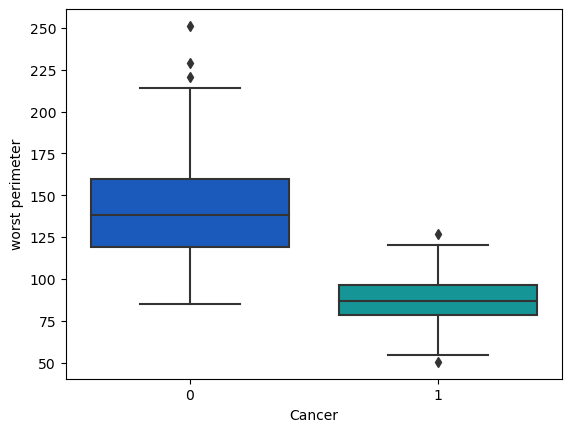

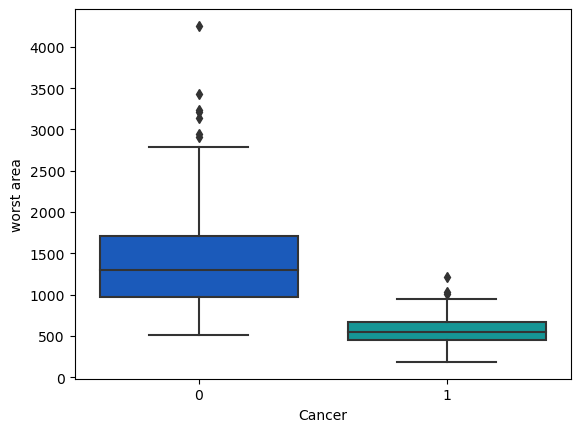

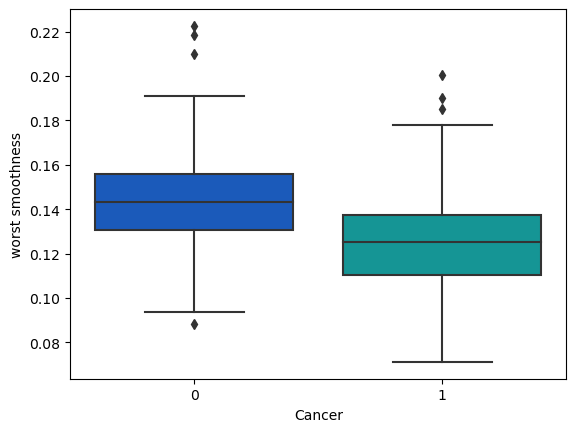

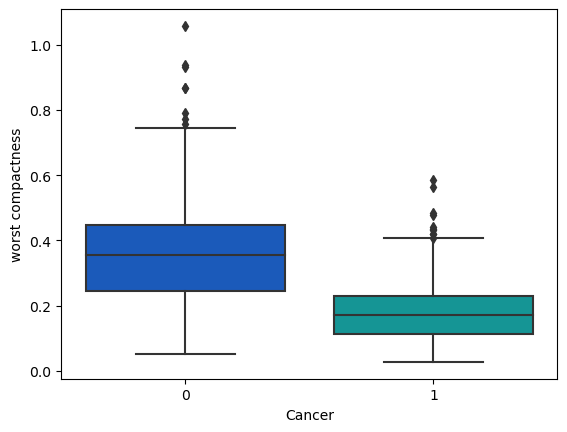

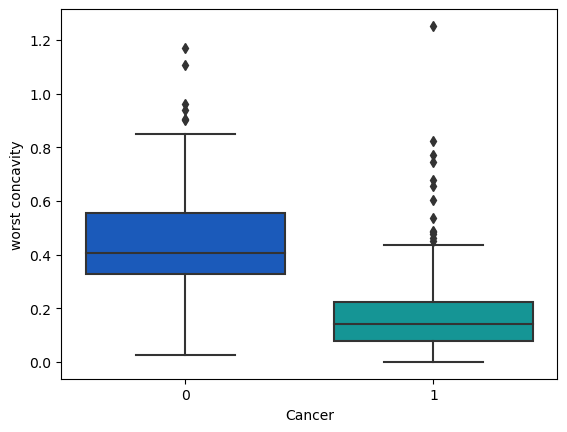

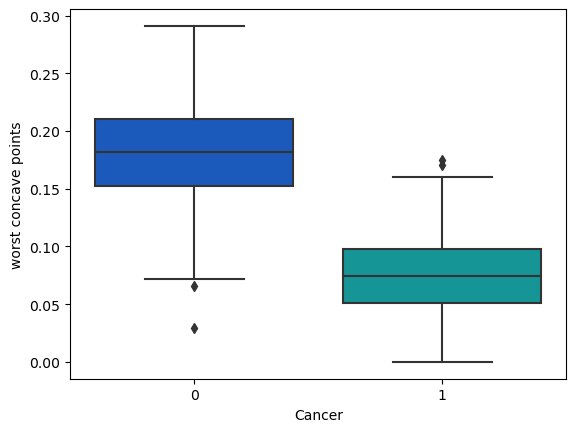

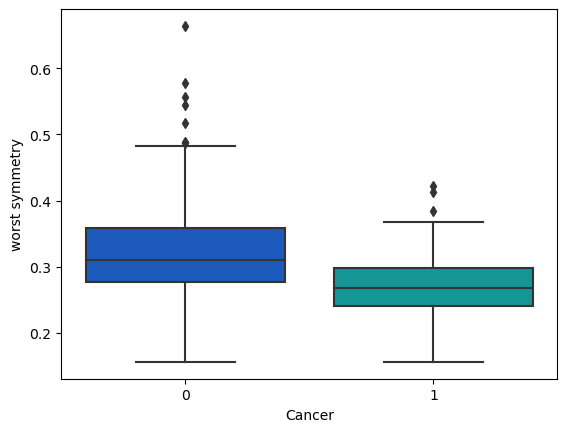

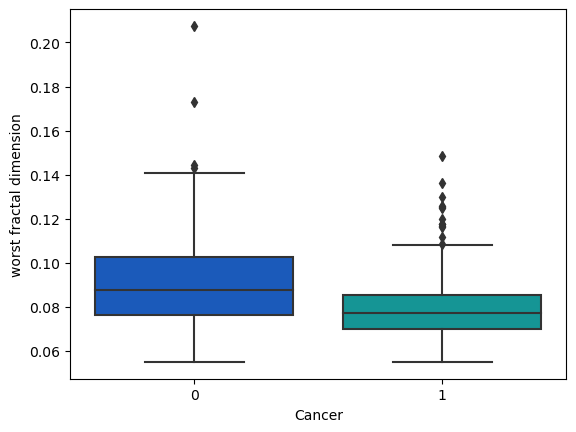

In [26]:
for i in range(len(df.columns)-1):
    sns.boxplot(x='Cancer',y=df.columns[i], data=df, palette='winter')
    plt.figure()
    
plt.close()

### TRAIN TEST SPLIT

In [27]:
df_feat = df.drop('Cancer',axis=1) 
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

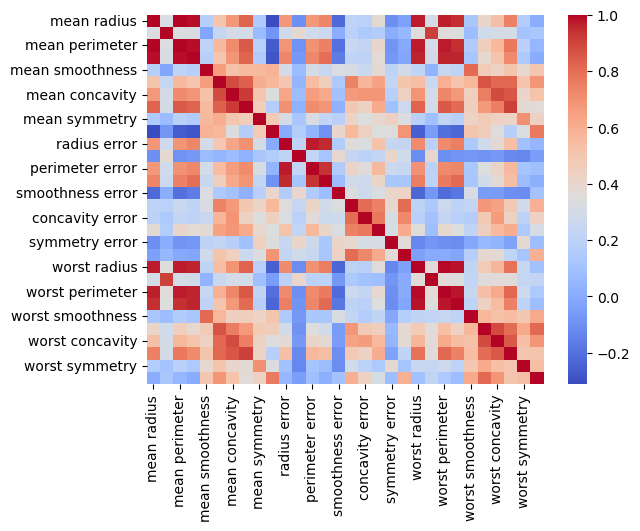

In [32]:
sns.heatmap(df_feat.corr(), cmap = "coolwarm")

In [33]:
df_target = df['Cancer']
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Cancer, dtype: int32

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, 
                                                    df_target, 
                                                    test_size=0.30, 
                                                    random_state=101, 
                                                    stratify=df_target)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [43]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([148, 250], dtype=int64))

In [44]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([ 64, 107], dtype=int64))

### Modelo SVM - Modelo original

In [45]:
model = SVC()

In [46]:
model.fit(X_train,y_train)

SVC()

### Predicciones sobre el modelo original

In [47]:
predictions = model.predict(X_test)

In [48]:
print(confusion_matrix(y_test,predictions))

[[ 48  16]
 [  1 106]]


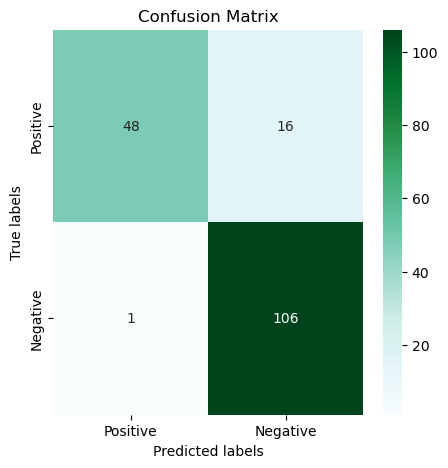

In [49]:
plt.figure(figsize=(5,5))

ax = sns.heatmap(
            confusion_matrix(y_test,predictions), 
            annot = True, 
            cmap = "BuGn",
            xticklabels = ['Positive', 'Negative'], 
            yticklabels = ['Positive', 'Negative'], 
            fmt='g'
                )

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        64
           1       0.87      0.99      0.93       107

    accuracy                           0.90       171
   macro avg       0.92      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171



### Mejoramos el modelo GridSearch

In [51]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']
             }

In [52]:
grid = GridSearchCV(SVC(),
                    param_grid)

In [53]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

### Predicciones sobre el modelo mejorado

In [54]:
grid_predictions = grid.predict(X_test)

In [55]:
print(confusion_matrix(y_test,grid_predictions))

[[ 60   4]
 [  6 101]]


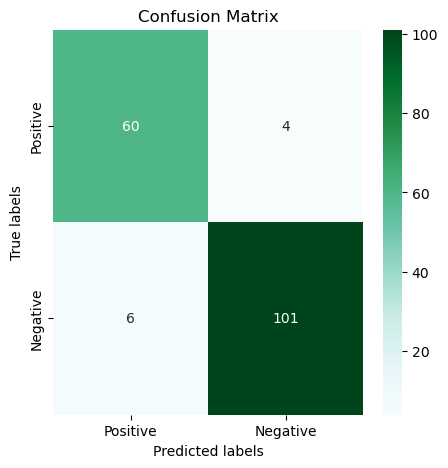

In [56]:
plt.figure(figsize=(5,5))

ax = sns.heatmap(
            confusion_matrix(y_test,grid_predictions), 
            annot = True, 
            cmap = "BuGn",
            xticklabels = ['Positive', 'Negative'], 
            yticklabels = ['Positive', 'Negative'], 
            fmt='g'
                )

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

In [57]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        64
           1       0.96      0.94      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# Ejercicio 

¿Mejorarán los resultados si escalamos los datos? Prueba a utilizar `StandardScaler` entrena de nuevo el modelo y obtén predicciones.

In [59]:
from sklearn.preprocessing import StandardScaler

# Normalizo los datos
sc = StandardScaler()

X_norm = sc.fit_transform(df_feat)

In [61]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_norm, 
                                                    df_target, 
                                                    test_size=0.30, 
                                                    random_state=101, 
                                                    stratify=df_target)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(398, 30)
(171, 30)
(398,)
(171,)


In [64]:
# Modelo SVM
clf = SVC()

params = {
    "C" : np.linspace(0.001, 1, 20),
    "kernel" : ["rbf", "linear"], 
    "gamma"  : np.linspace(0.001, 4, 50)
}

model_grid = GridSearchCV(clf, params, cv = 3, n_jobs=-1)

In [66]:
# Entrenamos
model_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([0.001     , 0.05357895, 0.10615789, 0.15873684, 0.21131579,
       0.26389474, 0.31647368, 0.36905263, 0.42163158, 0.47421053,
       0.52678947, 0.57936842, 0.63194737, 0.68452632, 0.73710526,
       0.78968421, 0.84226316, 0.89484211, 0.94742105, 1.        ]),
                         'gamma': array([1.00000000e-03, 8.26122449e-02, 1.64224490e-01, 2.45836735e-01...
       2.28614286e+00, 2.36775510e+00, 2.44936735e+00, 2.53097959e+00,
       2.61259184e+00, 2.69420408e+00, 2.77581633e+00, 2.85742857e+00,
       2.93904082e+00, 3.02065306e+00, 3.10226531e+00, 3.18387755e+00,
       3.26548980e+00, 3.34710204e+00, 3.42871429e+00, 3.51032653e+00,
       3.59193878e+00, 3.67355102e+00, 3.75516327e+00, 3.83677551e+00,
       3.91838776e+00, 4.00000000e+00]),
                         'kernel': ['rbf', 'linear']})

In [67]:
model_grid.best_params_

{'C': 0.15873684210526315, 'gamma': 0.001, 'kernel': 'linear'}

In [68]:
y_pred_grid = model_grid.best_estimator_.predict(X_test)

<Axes: >

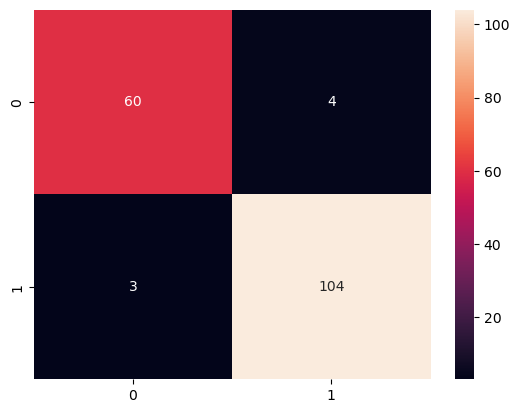

In [70]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_grid), annot = True, fmt="g")

In [72]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        64
           1       0.96      0.97      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

